In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-world-university-rankings-2016-2024/THE World University Rankings 2016-2024.csv
/kaggle/input/world-countries-generalized/World_Countries_Generalized.csv


# DATA UNDERSTANDING

First, let's check what info our dataset has.

**Rank :** The university's global rank <br>
**Name :** The university's name <br>
**Country :** The country in which the university is located <br>
**Student Population :** Total number of students in the university <br>
**Student to Staff Ratio :** Number of students per staff <br>
**International Students :** Percentage of international students <br>
**Female to Male Ratio :** Female to male ratio <br>
**Overall Score :** Score out of 100 based on teaching, research environment, research quality, industry impact, and international outlook <br>
**Teaching :** Score out of 100 measuring the university's quality of teaching <br>
**Research Environment :** Score out of 100 measuring the university's ability to provide a conducive environment for research <br> <br>


There are a few columns that are not described in our data card, therefore I will make asumptions of what it might represent. <br>
**Research Quality :** Score out of 100 measuring the university's ability to provide a quality research. <br>
**Industry Impact :** The university's effect compare to other university's. <br>
**International Outlook :**  International outlook is a mark of a top institution, relevant both to international and domestic students. <br>
**Year :** The year the research conducted 

In [2]:
df = pd.read_csv("/kaggle/input/the-world-university-rankings-2016-2024/THE World University Rankings 2016-2024.csv",  sep=",", encoding='cp1252')

In [3]:
df.head()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year
0,1.0,California Institute of Technology,United States,2243,6.9,26%,33 : 67,95.2,95.6,97.6,99.8,97.8,64.0,2016
1,2.0,University of Oxford,United Kingdom,19920,11.6,34%,46:54:00,94.2,86.5,98.9,98.8,73.1,94.4,2016
2,3.0,Stanford University,United States,15596,7.8,22%,42:58:00,93.9,92.5,96.2,99.9,63.3,76.3,2016
3,4.0,University of Cambridge,United Kingdom,18810,11.8,34%,46:54:00,92.8,88.2,96.7,97.0,55.0,91.5,2016
4,5.0,Massachusetts Institute of Technology,United States,11074,9.0,33%,37 : 63,92.0,89.4,88.6,99.7,95.4,84.0,2016


# DATA CLEANING 
## Checking for Null Values

We can see below that the only column that have null values is Female to Male Ratio. But it's only in 5% of our data, therefore we are going to drop all the null values from out dataframe.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12430 entries, 0 to 12429
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     12430 non-null  float64
 1   Name                     12430 non-null  object 
 2   Country                  12430 non-null  object 
 3   Student Population       12430 non-null  int64  
 4   Students to Staff Ratio  12430 non-null  float64
 5   International Students   12430 non-null  object 
 6   Female to Male Ratio     11839 non-null  object 
 7   Overall Score            12430 non-null  float64
 8   Teaching                 12430 non-null  float64
 9   Research Environment     12430 non-null  float64
 10  Research Quality         12430 non-null  float64
 11  Industry Impact          12430 non-null  float64
 12  International Outlook    12430 non-null  float64
 13  Year                     12430 non-null  int64  
dtypes: float64(8), int64(2

In [5]:
df.nunique()

Rank                        1904
Name                        2105
Country                      108
Student Population         10724
Students to Staff Ratio      655
International Students        89
Female to Male Ratio          90
Overall Score              10636
Teaching                     757
Research Environment         885
Research Quality             993
Industry Impact              870
International Outlook        883
Year                           9
dtype: int64

In [6]:
pd.isnull(df).sum()

Rank                         0
Name                         0
Country                      0
Student Population           0
Students to Staff Ratio      0
International Students       0
Female to Male Ratio       591
Overall Score                0
Teaching                     0
Research Environment         0
Research Quality             0
Industry Impact              0
International Outlook        0
Year                         0
dtype: int64

In [7]:
# Drop Null Values
df.dropna(inplace=True)

## Creating new features

Now that our dataset is clean we are going to a further analysis. 

## Female and Male Students
We can observe that in the Female to Male Ratio there are features formed like 33 : 67 (which means that for every 67 male students there are 33 female students) but there are also values like 46 : 54 : 00 which is probably miswriting. Let's seperate those values to get rid those miswritings and calculate how many female and male student each university has.

In [8]:
#splitting the column
df[['Female Students Ratio1', 'Male Students Ratio2', "Error"]] = df['Female to Male Ratio'].str.split(':', expand=True)

In [9]:
#changing type from object to float
df['Female Students Ratio1'] = df['Female Students Ratio1'].astype(float)
df['Male Students Ratio2'] = df['Male Students Ratio2'].astype(float)

In [10]:
#making new features
df["Female Students"] = ((df["Female Students Ratio1"]*df["Student Population"])/(df["Male Students Ratio2"]+df["Female Students Ratio1"])).round()
df["Male Students"] = df["Student Population"] - df["Female Students"]

## International Students

The column International Students is string and has a percentage which do not let us make operations.

In [11]:
#delete % from column
df["International Students"] = df["International Students"].str.rstrip("%")

When I tried to convert this column from string to float I had an error that didn't let me to change it. After a few agonised hours of dispear not knowing what was going wrong, I realised that was because empty values appeared in my column. Therefore, I replaced that with zero (because when empty cells appeared means that there weren't any international students in that university) and now our problem is gone.

In [12]:
df["International Students"].unique()

array(['26', '34', '22', '33', '27', '51', '37', '20', '23', '15', '46',
       '19', '17', '16', '35', '70', '36', '13', '54', '25', '18', '11',
       '38', '9', '10', '21', '28', '7', '8', '12', '24', '6', '29', '32',
       '47', '48', '14', '31', '40', '30', '5', '4', '39', '1', '52', '0',
       '3', '63', '44', '2', '43', '50', '42', '82', '55', '', '77', '49',
       '45', '41', '84', '71', '57', '53', '56', '61', '69', '59', '79',
       '76', '67', '60', '83', '58', '72', '81', '62', '88', '78', '86',
       '73', '91', '66', '64', '92', '75', '74'], dtype=object)

In [13]:
#replace null with 0
df["International Students"] = df["International Students"].replace('', '0', regex=True)

In [14]:
#convert column to float type
df["International Students"] = df["International Students"].astype(float)

In [15]:
df.head()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year,Female Students Ratio1,Male Students Ratio2,Error,Female Students,Male Students
0,1.0,California Institute of Technology,United States,2243,6.9,26.0,33 : 67,95.2,95.6,97.6,99.8,97.8,64.0,2016,33.0,67.0,None,740.0,1503.0
1,2.0,University of Oxford,United Kingdom,19920,11.6,34.0,46:54:00,94.2,86.5,98.9,98.8,73.1,94.4,2016,46.0,54.0,00,9163.0,10757.0
2,3.0,Stanford University,United States,15596,7.8,22.0,42:58:00,93.9,92.5,96.2,99.9,63.3,76.3,2016,42.0,58.0,00,6550.0,9046.0
3,4.0,University of Cambridge,United Kingdom,18810,11.8,34.0,46:54:00,92.8,88.2,96.7,97.0,55.0,91.5,2016,46.0,54.0,00,8653.0,10157.0
4,5.0,Massachusetts Institute of Technology,United States,11074,9.0,33.0,37 : 63,92.0,89.4,88.6,99.7,95.4,84.0,2016,37.0,63.0,None,4097.0,6977.0


In [16]:
#calculate number of international students
df["International Students"] = (df["International Students"]*df["Student Population"]/100).round()

## Drop columns

Let's delete all the unnecessary information that we have.

In [17]:
df = df.drop(['Female Students Ratio1', 'Male Students Ratio2','Error', 'Female to Male Ratio'], axis=1)

In [18]:
df.head()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year,Female Students,Male Students
0,1.0,California Institute of Technology,United States,2243,6.9,583.0,95.2,95.6,97.6,99.8,97.8,64.0,2016,740.0,1503.0
1,2.0,University of Oxford,United Kingdom,19920,11.6,6773.0,94.2,86.5,98.9,98.8,73.1,94.4,2016,9163.0,10757.0
2,3.0,Stanford University,United States,15596,7.8,3431.0,93.9,92.5,96.2,99.9,63.3,76.3,2016,6550.0,9046.0
3,4.0,University of Cambridge,United Kingdom,18810,11.8,6395.0,92.8,88.2,96.7,97.0,55.0,91.5,2016,8653.0,10157.0
4,5.0,Massachusetts Institute of Technology,United States,11074,9.0,3654.0,92.0,89.4,88.6,99.7,95.4,84.0,2016,4097.0,6977.0


# ASKING QUESTIONS

Now that we have cleaned our data, let's make some observations. Questions, questions and questions...

## Which country has the most universities?

In [19]:
country = df.groupby(['Country'])['Name'].count()

We can see that most of the universities that we have are located in United States (1454 universities) and then in United Kingdom with 869 universities.

In [20]:
country.sort_values(ascending=False)

Country
United States             1454
United Kingdom             869
Japan                      857
China                      492
India                      486
                          ... 
Zimbabwe                     2
Bosnia and Herzegovina       1
Kosovo                       1
North Macedonia              1
Armenia                      1
Name: Name, Length: 108, dtype: int64

## How many students in total has every country?

United Stated have almost 33 milion students and then is China with 16.5 milion. Armenia has the least number of students (13k).

In [21]:
Total_Students = df.groupby(['Country'])['Student Population'].sum()

In [22]:
Total_Students.sort_values(ascending=False)

Country
United States             32969305
China                     16307264
Turkey                    16121530
Egypt                     15474062
United Kingdom            14674430
                            ...   
North Macedonia              26800
Bosnia and Herzegovina       25468
Brunei Darussalam            18578
Mauritius                    16877
Armenia                      13838
Name: Student Population, Length: 108, dtype: int64

## Which are the top 10 universities for the year 2024?

This is a rather easy question as our data have arleady been in descending order. We only have to filter our data in the year column and see the first 10 rows. <br>
We know from above that in 2016 the top university was California Institute of Technology but for the year 2024 is University of Oxford.

In [23]:
year2024 = df[df.Year == 2024]
year2024.head(10)

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year,Female Students,Male Students
10526,1.0,University of Oxford,United Kingdom,21750,10.9,9135.0,98.4575,96.6,100.0,99.0,98.7,97.5,2024,10658.0,11092.0
10527,2.0,Stanford University,United States,14517,6.4,3339.0,97.9720,99.0,97.8,99.6,100.0,87.0,2024,6823.0,7694.0
10528,3.0,Massachusetts Institute of Technology,United States,11085,8.0,3658.0,97.9300,98.6,96.2,99.7,100.0,93.8,2024,4545.0,6540.0
10529,4.0,Harvard University,United States,20050,9.0,5012.0,97.7905,97.7,99.9,99.4,84.2,90.8,2024,10226.0,9824.0
10530,5.0,University of Cambridge,United Kingdom,20565,11.5,7815.0,97.4820,95.8,100.0,98.0,87.9,97.4,2024,9871.0,10694.0
10531,6.0,Princeton University,United States,7753,7.3,1783.0,96.9260,96.3,97.9,98.8,95.1,89.1,2024,3644.0,4109.0
10532,7.0,California Institute of Technology,United States,2240,6.1,739.0,96.4820,96.6,98.0,95.9,100.0,90.6,2024,829.0,1411.0
10533,8.0,Imperial College London,United Kingdom,20275,11.8,12368.0,95.0990,90.9,95.5,98.6,90.9,98.3,2024,8516.0,11759.0
10534,9.0,"University of California, Berkeley",United States,39991,17.9,8798.0,94.5620,87.2,98.8,99.0,99.4,86.8,2024,20795.0,19196.0
10535,10.0,Yale University,United States,11924,5.2,2504.0,94.2010,94.0,94.9,97.7,86.5,82.4,2024,6081.0,5843.0


## Which is the average overall score for every country?

We know that top universities are located in United States and United Kingdom but it seems that Singapore and Netherlands have very quality universities in total (quality over quantity). That means that even if United States and United Kingdom have a few very elegible universities in total there are many bad ones.

In [24]:
average_score = df.groupby('Country')['Overall Score'].mean().sort_values(ascending=False)
average_score

Country
Singapore                 78.475083
Netherlands               62.196644
Hong Kong                 58.488000
Switzerland               57.772093
Belgium                   53.267125
                            ...    
Bosnia and Herzegovina    16.571500
Montenegro                16.307500
Venezuela                 15.787321
Azerbaijan                15.018000
Kosovo                    14.347500
Name: Overall Score, Length: 108, dtype: float64

## How many female and male students are in each country?

Let's find out if there are a difference between female and male students.

In [25]:
f_m_students = df.groupby('Country')[['Female Students','Male Students', 'Student Population']].sum()
f_m_students.sort_values(by=['Female Students','Male Students', 'Student Population'], ascending=False, inplace=True)
f_m_students

,Female Students,Male Students,Student Population
Country,,,
United States,17034496.0,15802747.0,32969305
United Kingdom,8119436.0,6554994.0,14674430
Egypt,7785640.0,7688422.0,15474062
Turkey,7488769.0,8632761.0,16121530
China,7170490.0,8758552.0,16307264
...,...,...,...
Bosnia and Herzegovina,16300.0,9168.0,25468
Zambia,14097.0,23782.0,37879
Brunei Darussalam,12300.0,6278.0,18578


# DATA VISUALIZATION

Now my favorite part! We cleaned our data and we have a more clear view for them let's make few visualizations.

In [26]:
top3 = df[(df.Rank < 4) & (df.Year > 2020)]
top3['Overall Score'] = top3['Overall Score'].round(2)

/tmp/ipykernel_18/1815483515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3['Overall Score'] = top3['Overall Score'].round(2)


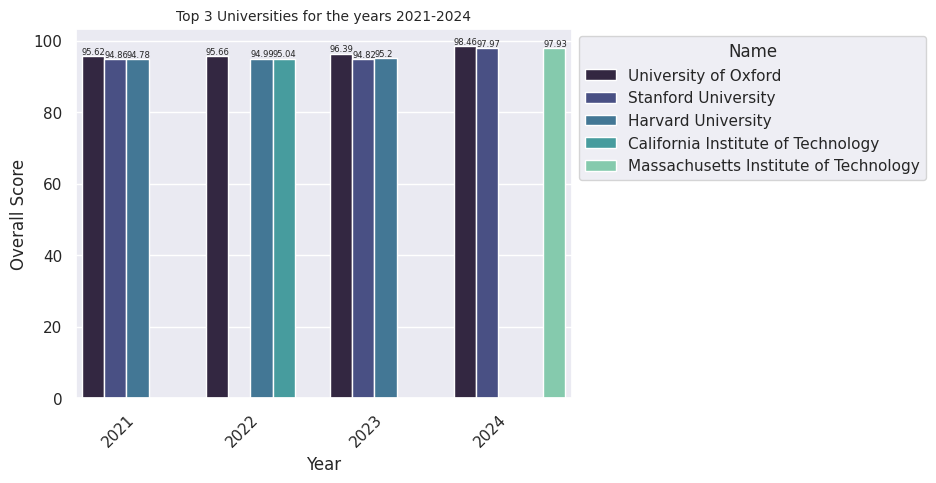

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')
#change font size
sns.set(font_scale=1)

#create grouped bar chart
ax = sns.barplot(x='Year', y='Overall Score', hue='Name', data=top3, width=0.9, palette='mako')
plt.title('Top 3 Universities for the years 2021-2024', fontsize=10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')

#add annotations in the chart
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x(),i.get_height()),va='bottom',ha='left', size=6)
plt.show()    

We can see from the above bar chart that:
* For the last 4 years University of Oxford has the first place. 
* Stanford University was not in the second place only for year 2022.
* Harvard University was 3rd until 2024.
* The values are so close to each other that feels almost meaningless the difference between them.

## Countries have the most female / male students and which ones have many international students?

The countries with the most female students won't be those with the largest numbers of Female Students but those that have bigger analogy with the Student Population. So, we have to compute this ratio first and then compare for every country.

In [28]:
df['Female ratio'] = (df['Female Students']/df['Student Population']).round(2)
df['Male ratio'] = (df['Male Students']/df['Student Population']).round(2)
df['International ratio'] = (df['International Students']/df['Student Population']).round(2)
df.head()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year,Female Students,Male Students,Female ratio,Male ratio,International ratio
0,1.0,California Institute of Technology,United States,2243,6.9,583.0,95.2,95.6,97.6,99.8,97.8,64.0,2016,740.0,1503.0,0.33,0.67,0.26
1,2.0,University of Oxford,United Kingdom,19920,11.6,6773.0,94.2,86.5,98.9,98.8,73.1,94.4,2016,9163.0,10757.0,0.46,0.54,0.34
2,3.0,Stanford University,United States,15596,7.8,3431.0,93.9,92.5,96.2,99.9,63.3,76.3,2016,6550.0,9046.0,0.42,0.58,0.22
3,4.0,University of Cambridge,United Kingdom,18810,11.8,6395.0,92.8,88.2,96.7,97.0,55.0,91.5,2016,8653.0,10157.0,0.46,0.54,0.34
4,5.0,Massachusetts Institute of Technology,United States,11074,9.0,3654.0,92.0,89.4,88.6,99.7,95.4,84.0,2016,4097.0,6977.0,0.37,0.63,0.33


### Female Ratio
The country with the most female students is United States. <br>
Second and third one are United Kingdom and Japan.

Text(0.5, 1.0, 'The 20 Countries with most female students')

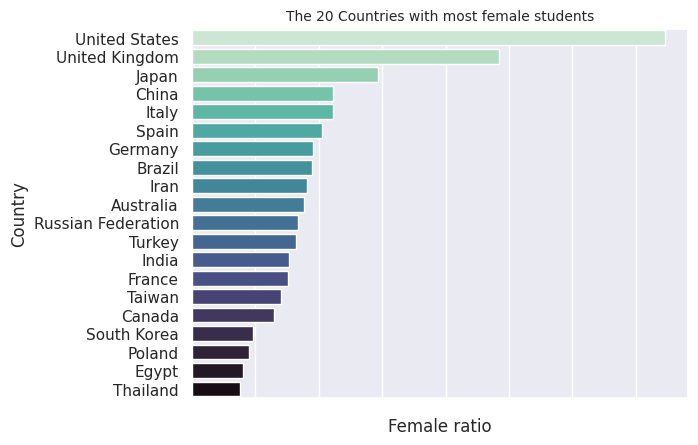

In [29]:
Female = df.groupby('Country', as_index=False)['Female ratio'].sum().sort_values(by='Female ratio', ascending=False).head(20)
ax = sns.barplot(data=Female, x='Female ratio', y='Country', hue='Female ratio', palette='mako', dodge=False).set(xticklabels=[])
plt.legend('', frameon=False)
plt.title('The 20 Countries with most female students', fontsize=10)

### Male Ratio
The country with the most male students is United States. <br>
Second and third one are Japan and United Kingdom.

Text(0.5, 1.0, 'The 20 Countries with most male students')

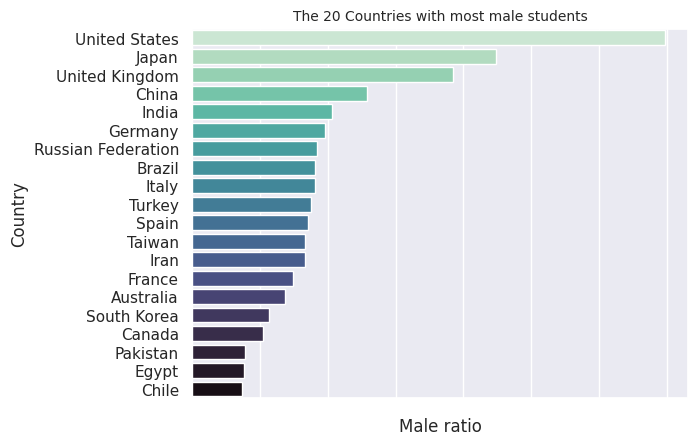

In [30]:
Male = df.groupby('Country', as_index=False)['Male ratio'].sum().sort_values(by='Male ratio', ascending=False).head(20)
sns.barplot(data=Male, x='Male ratio', y='Country', hue='Male ratio',palette='mako', dodge=False).set(xticklabels=[])
plt.legend('', frameon=False)
plt.title('The 20 Countries with most male students', fontsize=10)

### International Ratio
The country with the most foreign students is United Kingdom. <br>
Second and third one is United States and Australia.

Text(0.5, 1.0, 'The 20 Countries with most international students')

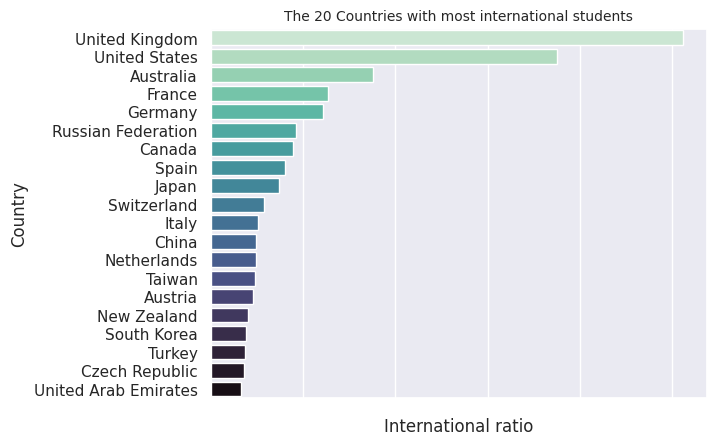

In [31]:
International = df.groupby('Country', as_index=False)['International ratio'].sum().sort_values(by='International ratio', ascending=False).head(20)
sns.barplot(data=International, x='International ratio', y='Country', hue='International ratio', palette='mako', dodge=False).set(xticklabels=[])
plt.legend('', frameon=False)
plt.title('The 20 Countries with most international students', fontsize=10)

## Does different scores have any correlations between one another?

Most of them have a big correlation with the overall score (which was obvious dahh) <br>
There is also a good correlation between Teaching and Research Environment (89%) <br>
All the other score types are positive related but the do not have a signifigant correlation between one another.

In [32]:
df2 = df[['Teaching', 'Research Environment', 'Research Quality', 'Industry Impact', 'International Outlook', 'Overall Score']].corr()
df2.head()

,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Overall Score
Teaching,1.000000,0.888921,0.527573,0.476266,0.376266,0.835404
Research Environment,0.888921,1.000000,0.600779,0.555235,0.519146,0.895640
Research Quality,0.527573,0.600779,1.000000,0.271350,0.577463,0.879342
Industry Impact,0.476266,0.555235,0.271350,1.000000,0.233400,0.477954
International Outlook,0.376266,0.519146,0.577463,0.233400,1.000000,0.650176


<Axes: >

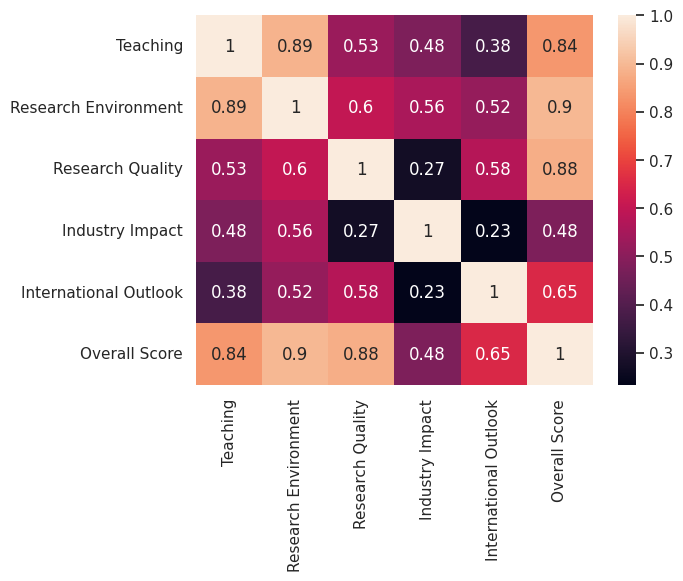

In [33]:
sns.heatmap(df2, annot=True)

## Which is the Overall Score for each university over the years?

A nice visualization would be to plot overall score for our universities in a map. 

In [34]:
import plotly.express as px

bubble_map = px.scatter_geo(df, locations='Country', locationmode='country names', color='Overall Score', 
size='Student Population', hover_name='Name', projection='natural earth', animation_frame='Year',
title='University Distribution Based on Overall Score and Student Population',
labels={'Overall Score': 'Overall Score', 'Student Population': 'Student Population'})

bubble_map.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [35]:
df.to_csv('worlduniversityrankings.csv', index=False)

Any questions or corrections about this notebook are most welcome and I will be happy to answer them. <br>
And for the people that liked my data analysis, I also made a dashboard on Tableau platform, you can check it out [here](https://public.tableau.com/app/profile/rita.angelou/viz/WorldUniversityRank2016-2024/WorldUniversityRankingforYears2016-2024) 